In [30]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import accuracy_score,confusion_matrix , classification_report
from sklearn.datasets import make_classification
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
from sklearn.metrics import accuracy_score, precision_score,recall_score
from sklearn.metrics import plot_confusion_matrix
from sklearn.metrics import classification_report

In [31]:
data =pd.read_csv('aug_train.csv')
data.head()

,enrollee_id,city,city_development_index,gender,relevent_experience,enrolled_university,education_level,major_discipline,experience,company_size,company_type,last_new_job,training_hours,target
0,8949,city_103,0.920,Male,Has relevent experience,no_enrollment,Graduate,STEM,>20,NaN,NaN,1,36,1.0
1,29725,city_40,0.776,Male,No relevent experience,no_enrollment,Graduate,STEM,15,50-99,Pvt Ltd,>4,47,0.0
2,11561,city_21,0.624,NaN,No relevent experience,Full time course,Graduate,STEM,5,NaN,NaN,never,83,0.0
3,33241,city_115,0.789,NaN,No relevent experience,NaN,Graduate,Business Degree,<1,NaN,Pvt Ltd,never,52,1.0
4,666,city_162,0.767,Male,Has relevent experience,no_enrollment,Masters,STEM,>20,50-99,Funded Startup,4,8,0.0


In [32]:
data.shape

(19158, 14)

In [33]:
data.isnull().sum( )

enrollee_id                  0
city                         0
city_development_index       0
gender                    4508
relevent_experience          0
enrolled_university        386
education_level            460
major_discipline          2813
experience                  65
company_size              5938
company_type              6140
last_new_job               423
training_hours               0
target                       0
dtype: int64

In [34]:
#convert string to float
le = LabelEncoder()
object_values = list(data.select_dtypes(include=['object']).columns.values)
for i in object_values:
    print(i)
    data[i].fillna('UNK', inplace=True) # Unk --> unknown word
    data[i] = le.fit_transform(data[i])

city
gender
relevent_experience
enrolled_university
education_level
major_discipline
experience
company_size
company_type
last_new_job


In [35]:
# convert all columns to one type (int)
enc = LabelEncoder()
for j in data.columns:
    data[j] = enc.fit_transform(data[j])

In [36]:
data.head()

,enrollee_id,city,city_development_index,gender,relevent_experience,enrolled_university,education_level,major_discipline,experience,company_size,company_type,last_new_job,training_hours,target
0,5018,5,85,1,0,3,0,5,21,8,6,0,35,1
1,16986,77,48,1,1,3,0,5,6,4,5,4,46,0
2,6499,64,14,3,1,0,0,5,15,8,6,6,82,0
3,19067,14,52,3,1,2,0,1,20,8,5,6,51,1
4,358,50,45,1,0,3,2,5,21,4,1,3,7,0


In [37]:
data.isnull().sum()

enrollee_id               0
city                      0
city_development_index    0
gender                    0
relevent_experience       0
enrolled_university       0
education_level           0
major_discipline          0
experience                0
company_size              0
company_type              0
last_new_job              0
training_hours            0
target                    0
dtype: int64

In [38]:
data=data.set_index('enrollee_id')

In [39]:
x=data.drop(columns='target')
y=data['target']

In [40]:
x_train,x_test,y_train,y_test = train_test_split(x,y,train_size=.80,random_state=0)

In [42]:
# Normalization
sc=StandardScaler()
standard_data=data.copy()
standard_data =sc.fit_transform(standard_data)
standard_data=pd.DataFrame(standard_data,columns=data.columns)
standard_data.head(10)

,city,city_development_index,gender,relevent_experience,enrolled_university,education_level,major_discipline,experience,company_size,company_type,last_new_job,training_hours,target
0,-1.105203,0.755890,-0.453100,-0.623752,0.599493,-0.681411,0.128373,1.218165,1.188828,0.797357,-0.904269,-0.512663,1.735070
1,0.925077,-0.510081,-0.453100,1.603202,0.599493,-0.681411,0.128373,-1.050588,-0.207910,0.127279,0.918254,-0.300048,-0.576346
2,0.558499,-1.673406,1.725463,1.603202,-1.852315,-0.681411,0.128373,0.310664,1.188828,0.797357,1.829515,0.395783,-0.576346
3,-0.851418,-0.373219,1.725463,1.603202,-0.217776,-0.681411,-3.664035,1.066915,1.188828,0.127279,1.829515,-0.203405,1.735070
4,0.163722,-0.612727,-0.453100,-0.623752,0.599493,1.001625,0.128373,1.218165,-0.207910,-2.553031,0.462623,-1.053865,-0.576346
5,0.361110,-0.681158,1.725463,-0.623752,-1.035046,-0.681411,0.128373,-1.655589,1.188828,0.797357,-0.904269,-0.744607,1.735070
6,0.135524,0.755890,-0.453100,-0.623752,0.599493,0.160107,1.076475,0.310664,-0.207910,-2.553031,-0.904269,-0.744607,-0.576346
7,1.094267,-0.749589,-0.453100,-0.623752,0.599493,-0.681411,0.128373,-1.353089,0.839643,0.127279,0.918254,-0.860579,1.735070
8,-1.105203,0.755890,-0.453100,-0.623752,0.599493,-0.681411,0.128373,0.613164,-0.207910,0.127279,-0.904269,-0.319377,1.735070
9,-1.105203,0.755890,1.725463,-0.623752,0.599493,-0.681411,0.128373,-0.748088,-0.557095,0.127279,0.918254,1.130272,-0.576346


In [57]:
model=LogisticRegression()
model.fit(x_train,y_train)

C:\Users\user\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [58]:
y_pred=model.predict(x_test)
y_pred

array([0, 0, 0, ..., 1, 0, 1], dtype=int64)

In [59]:
print('Accuracy of Model: ', accuracy_score(y_test,y_pred)*100)

Accuracy of Model:  76.74843423799582


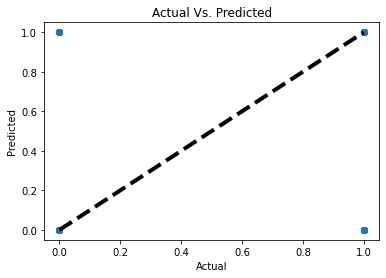

In [48]:
fig, ax = plt.subplots()
ax.scatter(y_test, y_pred)
ax.plot([y.min(), y.max()], [y.min(), y.max()], 'k--', lw=4)
ax.set_title('Actual Vs. Predicted')
ax.set_xlabel('Actual')
ax.set_ylabel('Predicted')
plt.show()

In [50]:
cf_matrix = confusion_matrix(y_test,y_pred)
cf_matrix

array([[2694,  188],
       [ 707,  243]], dtype=int64)

<AxesSubplot:>

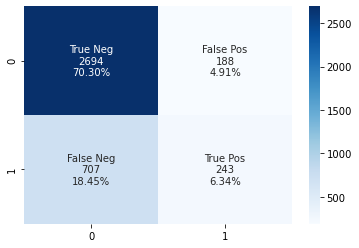

In [54]:
group_names = ['True Neg','False Pos','False Neg','True Pos']
group_counts = ["{0:0.0f}".format(value) for value in
                cf_matrix.flatten()]
group_percentages = ["{0:.2%}".format(value) for value in
                     cf_matrix.flatten()/np.sum(cf_matrix)]
labels = [f"{v1}\n{v2}\n{v3}" for v1, v2, v3 in
          zip(group_names,group_counts,group_percentages)]
labels = np.asarray(labels).reshape(2,2)
sns.heatmap(cf_matrix, annot=labels, fmt='', cmap='Blues')

In [52]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.79      0.93      0.86      2882
           1       0.56      0.26      0.35       950

    accuracy                           0.77      3832
   macro avg       0.68      0.60      0.60      3832
weighted avg       0.74      0.77      0.73      3832



In [ ]:
# print("Precision:",precision_score(y_test, y_pred)*100)
# print("Recall:",recall_score(y_test, y_pred)*100)